In [10]:
import numpy as np 
import pandas as pd 
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.signal import deconvolve
import holidays
from analysis import *

In [8]:
def fourierExtrapolation(x, n_predict, n_harm=10):
    n = x.size

    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)

    x_notrend = x - p[0] * t - p[1]            # signal detrended 
    x_freqdom = np.fft.fft(x_notrend)   # signal in frequencies domain
    f = np.fft.fftfreq(n)               # frequencies

    indexes = list(range(n))
    indexes.sort(key= lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sign = np.zeros(t.size)

    for i in indexes[:1 + n_harm * 2]:
        amplitude = np.absolute(x_freqdom[i]) / n
        phase = np.angle(x_freqdom[i])
        restored_sign += amplitude * np.cos(2 * np.pi * f[i] * t + phase)
    
    return restored_sign + p[0] * t + p[1]

In [11]:
poland_holidays = holidays.CountryHoliday('Poland')

In [13]:
data = pd.read_csv("../Data/daneOkresoweKSE.csv", sep=';', skiprows=1, names=['Date', 'Hour', 'Minute', 'Load'])
Electric = data.copy()
Electric['Date'] = pd.to_datetime(Electric.Date)

Electric.loc[Electric.Hour == 24, 'Date'] = Electric.loc[Electric.Hour == 24, 'Date'] + timedelta(days=1)
Electric.loc[Electric.Hour == 24, 'Hour'] = 0

Electric.Date = pd.to_datetime(Electric.Date.astype(str) + ' ' + Electric['Hour'].astype(str) + ':' + Electric.Minute.astype(str) + ':00')
Electric['Seconds'] = (Electric.Date - Electric.Date[0]).dt.total_seconds()
Electric = Electric[['Date', 'Seconds', 'Load']]
Electric['Day'] = Electric['Date'].dt.day_name()
Electric['Minutes'] = Electric['Date'].dt.minute
Electric['Hour'] = Electric['Date'].dt.hour
Electric['Holiday'] = Electric.Date.apply(lambda x: x in poland_holidays)
Electric.loc[Electric.Day.isin(['Sunday']) ,'Holiday'] = True

Index(['Date', 'Seconds', 'Load', 'Day', 'Minutes', 'Hour', 'Holiday'], dtype='object')

In [44]:
Electric.loc[Electric.Day == 'Saturday', 'Holiday'] = True

Electric

,Date,Seconds,Load,Day,Minutes,Hour,Holiday
0,2008-01-01 00:15:00,0.0,15938.8,Tuesday,15,0,True
1,2008-01-01 00:30:00,900.0,15770.4,Tuesday,30,0,True
2,2008-01-01 00:45:00,1800.0,15766.3,Tuesday,45,0,True
3,2008-01-01 01:00:00,2700.0,15415.2,Tuesday,0,1,True
4,2008-01-01 01:15:00,3600.0,15351.8,Tuesday,15,1,True
...,...,...,...,...,...,...,...
315643,2016-12-31 23:00:00,284078700.0,15952.7,Saturday,0,23,True
315644,2016-12-31 23:15:00,284079600.0,15865.3,Saturday,15,23,True
315645,2016-12-31 23:30:00,284080500.0,15693.5,Saturday,30,23,True
315646,2016-12-31 23:45:00,284081400.0,15508.3,Saturday,45,23,True


In [ ]:
Electric.Day.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [45]:
cutting_day = '2014-12-30'
train_set = Electric[Electric.Date <= pd.to_datetime(cutting_day, format='%Y-%m-%d')]
test_set = Electric[Electric.Date >= pd.to_datetime(cutting_day, format='%Y-%m-%d')]

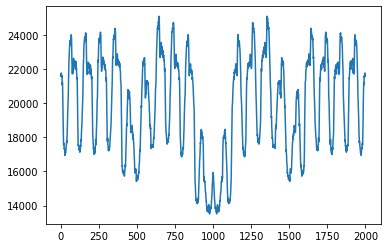

In [ ]:
plt.plot(np.concatenate([Electric.Load.values[:1000][::-1], Electric.Load.values[:1000]]))
#plt.xlim(900,1000)

In [ ]:
# prima di fare le analisi simili bisogna estendere 
# il segnale in modo tale da eliminare gli effetti sui bordi dati dalla
# convoluzione.

In [46]:
working_days = train_set[~train_set.Holiday].reset_index(drop=True)
festivities = train_set[train_set.Holiday].reset_index(drop=True)

In [71]:
f = {'Load': ['mean', q1, q2]}

work_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
pred_working_days = working_days.groupby(['Day', 'Hour', 'Minutes']).agg(f)
pred_working_days = pred_working_days.loc[work_days]
pred_festivities = festivities.groupby(['Hour', 'Minutes']).agg(f)


psfs_work_days = pred_working_days.to_numpy()
psf_work_days = psfs_work_days[:, 0].copy()
psf_work_days_q1 = psfs_work_days[:, 1].copy()
psf_work_days_q2 = psfs_work_days[:, 2].copy()

psfs_festivities = pred_festivities.to_numpy()
psf_festivities = psfs_festivities[:, 0].copy()
psf_festivities_q1 = psfs_festivities[:, 1].copy()
psf_festivities_q2 = psfs_festivities[:, 2].copy()


#a = pred_working_days.loc[work_days].to_numpy()
#b = pred_festivities.to_numpy()

#psfs = np.concatenate([a, b])

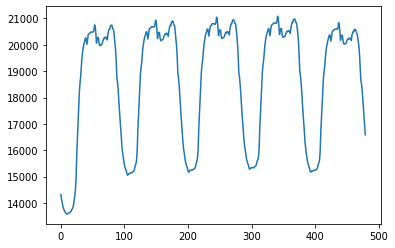

In [61]:
plt.plot(psf_work_days)

In [33]:
#psf = psfs[:, 0]
#psf_q1 = psfs[:, 1].copy()
#psf_q2 = psfs[:, 2].copy()

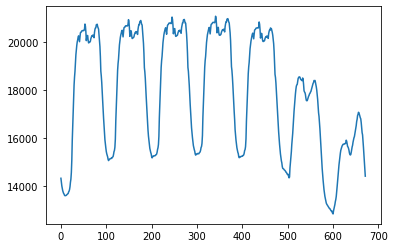

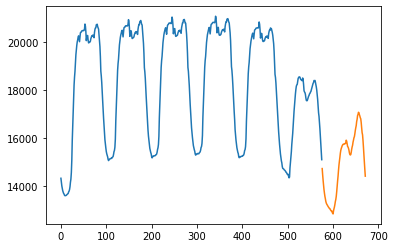

In [37]:
plt.plot(psf)
plt.show()

plt.plot(a[:, 0])
plt.plot(range(len(a), len(a)+len(b)), b[:, 0])

In [70]:
working_days

,Date,Seconds,Load,Day,Minutes,Hour,Holiday
0,2008-01-02 00:00:00,85500.0,14609.7,Wednesday,0,0,False
1,2008-01-02 00:15:00,86400.0,14343.0,Wednesday,15,0,False
2,2008-01-02 00:30:00,87300.0,14439.0,Wednesday,30,0,False
3,2008-01-02 00:45:00,88200.0,14221.1,Wednesday,45,0,False
4,2008-01-02 01:00:00,89100.0,14338.6,Wednesday,0,1,False
...,...,...,...,...,...,...,...
169820,2014-12-29 23:00:00,220747500.0,18507.7,Monday,0,23,False
169821,2014-12-29 23:15:00,220748400.0,18057.9,Monday,15,23,False
169822,2014-12-29 23:30:00,220749300.0,17728.6,Monday,30,23,False
169823,2014-12-29 23:45:00,220750200.0,17261.8,Monday,45,23,False


In [130]:
load_working_days = working_days.Load.to_numpy()
load_festivities = festivities.Load.to_numpy()

def dec(signal, psf, window=96):
    deconv=np.zeros(len(signal))
    for i in range(len(signal)//window - 2):
        #print(i / (len(signal)//window))
        deconv[i*window:(i+1)*window +1] = deconvolve(signal[(i*window) : (i+2)*window], psf)[0]
        deconv[(i+1)*window:(i+2)*window+1] = deconvolve(signal[(i+1)*window:(i+3)*window], psf)[0]
    return deconv

deconv_psf_working_days = dec(load_working_days, psf_work_days, len(psf_work_days))
deconv_psf_festivities = dec(load_festivities, psf_festivities, len(psf_festivities))

deconv_psf_q1_work = dec(load_working_days, psf_work_days_q1, len(psf_work_days))
deconv_psf_q2_work = dec(load_working_days, psf_work_days_q2, len(psf_work_days))

deconv_psf_q1_fest = dec(load_festivities, psf_festivities_q1, len(psf_festivities))
deconv_psf_q2_fest = dec(load_festivities, psf_festivities_q2, len(psf_festivities))

load_psf_working = np.convolve(deconv_psf_working_days, psf_work_days, 'valid')[:-96]
load_psf_festivities = np.convolve(deconv_psf_festivities, psf_festivities, 'valid')[:-96]

load_q1_work = np.convolve(deconv_psf_q1_work, psf_work_days_q1, 'valid')[:-96]
load_q2_work = np.convolve(deconv_psf_q2_work, psf_work_days_q2, 'valid')[:-96]

load_q1_fest = np.convolve(deconv_psf_q1_fest, psf_festivities_q1, 'valid')[:-96]
load_q2_fest = np.convolve(deconv_psf_q2_fest, psf_festivities_q2, 'valid')[:-96]

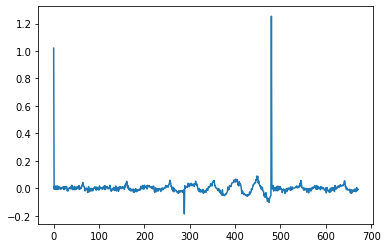

In [87]:
plt.plot(deconv_psf_working_days[:96*7])

In [ ]:
np.where(deconv_psf > 0.5)[0][:14]

array([   0,   96,  192,  288,  384,  480,  576,  672,  768,  864,  960,
       1056, 1152, 1248], dtype=int64)

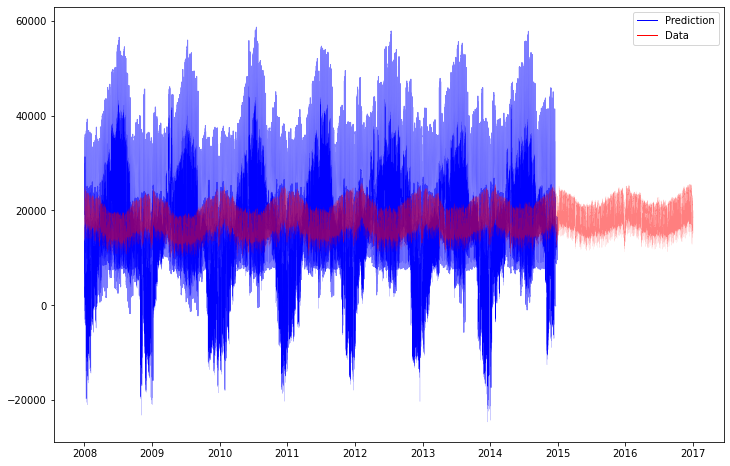

In [132]:
n = len(working_days) - len(load_psf_working)
m = len(festivities) - len(load_psf_festivities)

plt.figure(figsize=(12, 8))
plt.plot(working_days.Date[:-n], load_psf_working, 'b', lw=0.1, label='Prediction')
plt.plot(festivities.Date[:-m], load_psf_festivities, 'b', lw=0.1)
plt.fill_between(x=working_days.Date[:-n], y1=load_q1_work, y2=load_q2_work, color='b', alpha=0.5)
plt.fill_between(x=festivities.Date[:-m], y1=load_q1_fest, y2=load_q2_fest, color='b', alpha=0.5)
plt.plot(Electric.Date, Electric.Load, 'r', lw=0.1, alpha=0.5, label='Data')
leg = plt.legend()

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(1)

In [102]:
working_days_test = test_set[~test_set.Holiday]
festivities_test = test_set[test_set.Holiday]

working_days_test.index

Int64Index([245279, 245280, 245281, 245282, 245283, 245284, 245285, 245286,
            245287, 245288,
            ...
            315541, 315542, 315543, 315544, 315545, 315546, 315547, 315548,
            315549, 315550],
           dtype='int64', length=48768)